### Import


In [1]:
import pandas as pd

df = pd.read_csv("4-onehot-encoded.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)


In [2]:
df.dtypes.tail(60)


race_Asian                            int64
race_Hawaiian_PacIslander             int64
race_White_Black                      int64
race_White_AmIndianAlaskaNat          int64
race_White_Asian                      int64
race_White_Hawaiian                   int64
race_Black_AmIndianAlaskaNat          int64
race_Black_Asian                      int64
race_Black_Hawaiian                   int64
race_AmIndianAlaskaNat_Asian          int64
race_Asian_Hawaiian                   int64
race_White_Black_AmIndianAlaskaNat    int64
race_White_Black_Asian                int64
race_White_AmIndianAlaskaNat_Asian    int64
race_White_Asian_Hawaiian             int64
race_Other_2or3_races                 int64
edu_LessThan1stGrade                  int64
edu_1st_4thGrade                      int64
edu_5th_6thGrade                      int64
edu_7th_8thGrade                      int64
edu_9thGrade                          int64
edu_10thGrade                         int64
edu_11thGrade                   

In [3]:
from sklearn.preprocessing import StandardScaler

# Select features (excluding target variables and identifiers)
feature_cols = [
    col
    for col in df.columns
    if col
    not in [
        "OMB13CBSA",
        "expHomelessness_NoOneinHH",
        "expHomelessness_OnePersonInHH",
        "expHomelessness_TwoPlusInHH",
    ]
]

# Scale features to have mean=0 and std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols])

# Create a DataFrame with scaled values for easier reference
scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

scaled_df


,HHAGE,HINCP,PERPOVLVL,FINCP,TOTHCAMT,housing_cost_percentage,race_White,race_Black,race_AmIndian_AlaskaNative,race_Asian,...,nowhereToGo_TwoPlusInHH,moves_None,moves_One,moves_TwoPlus,behindPayments_1or2Months,behindPayments_SomeMonths,behindPayments_AlmostEveryMonth,behindPayments_EveryMonth,behindPayments_MonthsNotReported,behindPayments_NotBehind
0,-1.935391,-0.267230,-0.215186,-0.242910,-0.327910,-0.094950,0.683525,-0.509959,-0.134634,-0.273034,...,-0.137948,-2.724515,2.849877,-0.095806,-0.210872,-0.143666,-0.078938,-0.071796,-0.022001,0.283927
1,0.297914,-0.403028,-0.197207,-0.379611,-0.067355,-0.067750,0.683525,-0.509959,-0.134634,-0.273034,...,-0.137948,0.367038,-0.350892,-0.095806,-0.210872,-0.143666,-0.078938,-0.071796,-0.022001,0.283927
2,-0.848918,0.785611,0.228276,0.816932,0.809977,-0.096421,0.683525,-0.509959,-0.134634,-0.273034,...,7.249084,0.367038,-0.350892,-0.095806,-0.210872,-0.143666,-0.078938,-0.071796,-0.022001,0.283927
3,1.444747,-0.650081,-1.359797,-0.628307,-0.659885,0.135152,0.683525,-0.509959,-0.134634,-0.273034,...,-0.137948,0.367038,-0.350892,-0.095806,-0.210872,-0.143666,-0.078938,-0.071796,-0.022001,0.283927
4,-0.547120,0.645723,1.594618,0.676114,0.050798,-0.103772,0.683525,-0.509959,-0.134634,-0.273034,...,-0.137948,0.367038,-0.350892,-0.095806,-0.210872,-0.143666,-0.078938,-0.071796,-0.022001,0.283927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,0.358274,0.158160,1.570647,0.185309,0.473152,-0.089069,0.683525,-0.509959,-0.134634,-0.273034,...,-0.137948,-2.724515,2.849877,-0.095806,-0.210872,-0.143666,-0.078938,-0.071796,-0.022001,0.283927
10331,0.901510,-0.332675,-0.760524,-0.638189,-0.324823,-0.090539,0.683525,-0.509959,-0.134634,-0.273034,...,-0.137948,0.367038,-0.350892,-0.095806,-0.210872,-0.143666,-0.078938,-0.071796,-0.022001,0.283927
10332,0.478993,-0.067624,0.761629,-0.041976,0.010679,-0.092010,0.683525,-0.509959,-0.134634,-0.273034,...,-0.137948,-2.724515,2.849877,-0.095806,-0.210872,-0.143666,-0.078938,-0.071796,-0.022001,0.283927
10333,-0.245322,0.362675,1.594618,0.391184,-0.113206,-0.103772,0.683525,-0.509959,-0.134634,-0.273034,...,-0.137948,0.367038,-0.350892,-0.095806,-0.210872,-0.143666,-0.078938,-0.071796,-0.022001,0.283927


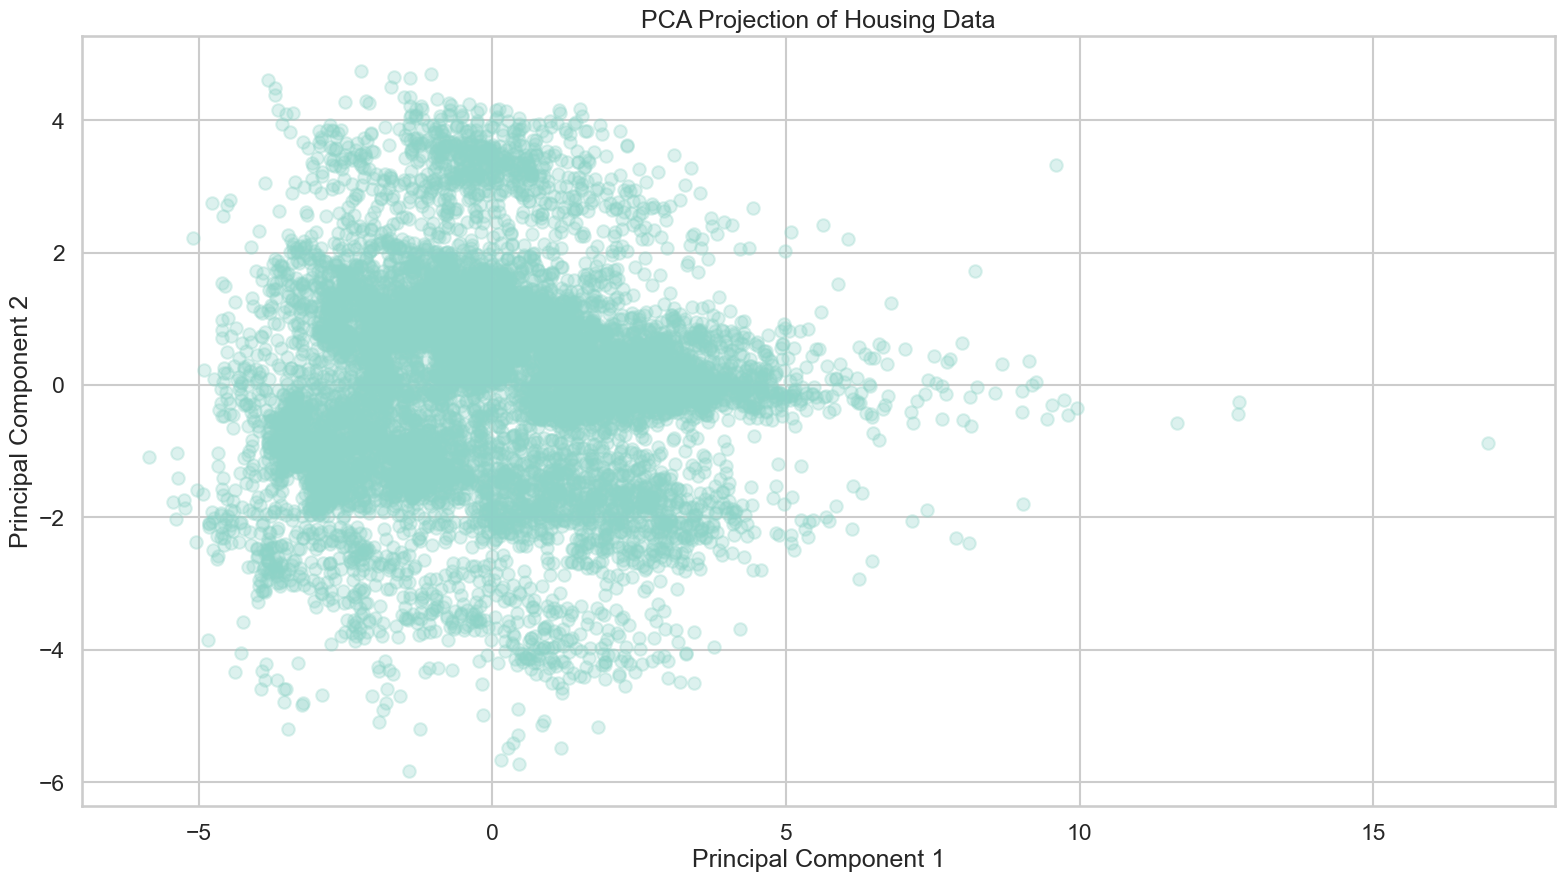

Variance explained by PC1: 7.72%
Variance explained by PC2: 3.86%
Total variance explained: 11.58%
Top 33 Features:
                                      PC1    PC2
PERPOVLVL                           35.20  -1.78
tenure_Owned                        32.80 -16.83
HINCP                               31.44  -1.29
FINCP                               31.26  -2.26
fs_No                               28.17   4.25
TOTHCAMT                            21.01   2.47
dis_NoDisabled                      19.26  37.02
edu_BachelorsDegree                 14.95   1.56
edu_MastersDegree                   12.66  -1.03
nowhereToGo_NoOneinHH               12.54  15.07
behindPayments_NotBehind            11.45  -6.41
race_White                          11.29 -13.51
edu_DoctorateDegree                  6.89  -0.99
race_Asian                           5.67   8.81
edu_ProfessionalDegree               5.46  -0.93
moves_None                           4.89 -34.50
mil_1_Veteran                        4.39 -30.94
mi

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a nice plotting style
sns.set_style("whitegrid")
sns.set_context("talk")

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for easy plotting
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Visualize the projection without clusters yet
plt.figure(figsize=(19, 10))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.3)
plt.title("PCA Projection of Housing Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Check how much variance is explained by these components
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained_variance[0]:.2%}")
print(f"Variance explained by PC2: {explained_variance[1]:.2%}")
print(f"Total variance explained: {sum(explained_variance):.2%}")

pd.set_option("display.precision", 2)


# Analyze what each principal component represents
component_df = pd.DataFrame(
    pca.components_.T, index=feature_cols, columns=["PC1", "PC2"]
)
features = component_df[["PC1", "PC2"]].sort_values(["PC1", "PC2"], ascending=False)

print("Top 33 Features:")
top_features_formatted = features.iloc[0:33, :].multiply(100).round(2)
print(top_features_formatted.to_string())

print("\nBottom 33 Features:")
bottom_features_formatted = features.tail(33).multiply(100).round(2)
print(bottom_features_formatted.to_string())


<Axes: xlabel='PC1', ylabel='PC2'>

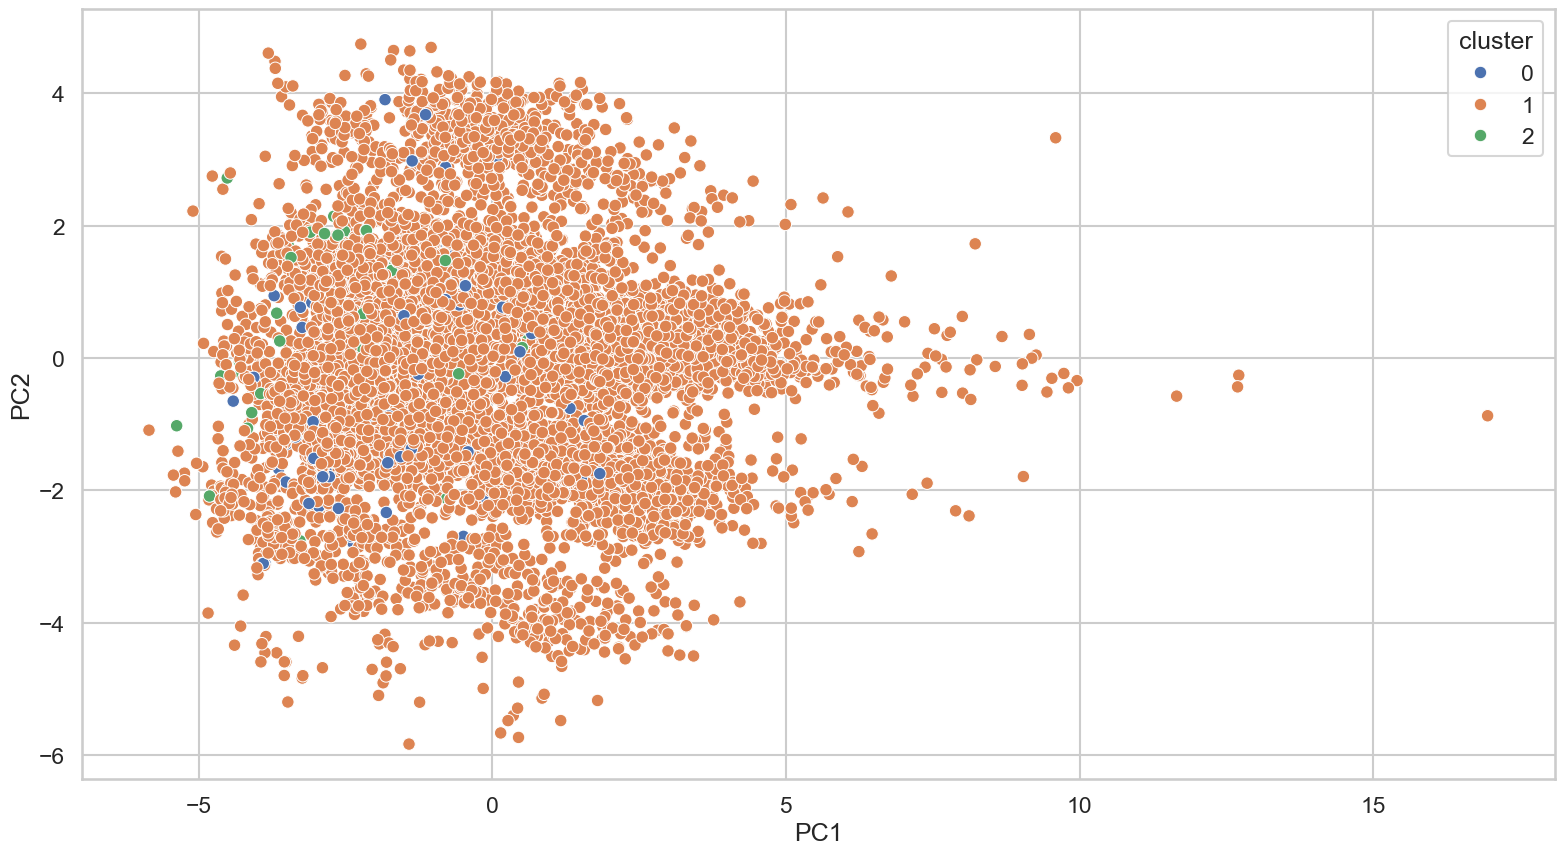

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)

df["cluster"] = km.fit_predict(X_scaled)
pca_df["cluster"] = df["cluster"]

plt.figure(figsize=(19, 10))

sns.scatterplot(pca_df, x="PC1", y="PC2", hue="cluster", palette="deep")


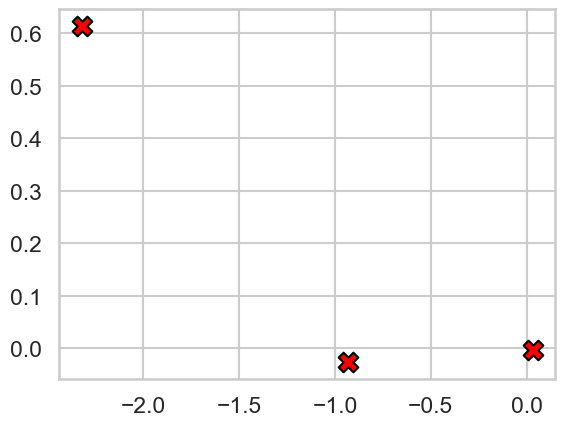

In [6]:
# Transform cluster centers to PCA space
centers_pca = pca.transform(km.cluster_centers_)

# Plot centers on the PCA plot
plt.scatter(
    centers_pca[:, 0],
    centers_pca[:, 1],
    s=200,
    marker="X",
    c="red",
    edgecolor="black",
    label="Cluster Centers",
)


In [7]:
# Get mean PC values for each cluster
cluster_pc_profiles = pca_df.groupby("cluster")[["PC1", "PC2"]].mean()
print("Cluster profiles in principal component space:")
print(cluster_pc_profiles)


Cluster profiles in principal component space:
          PC1       PC2
cluster                
0       -0.93 -2.63e-02
1        0.03 -3.41e-03
2       -2.32  6.15e-01


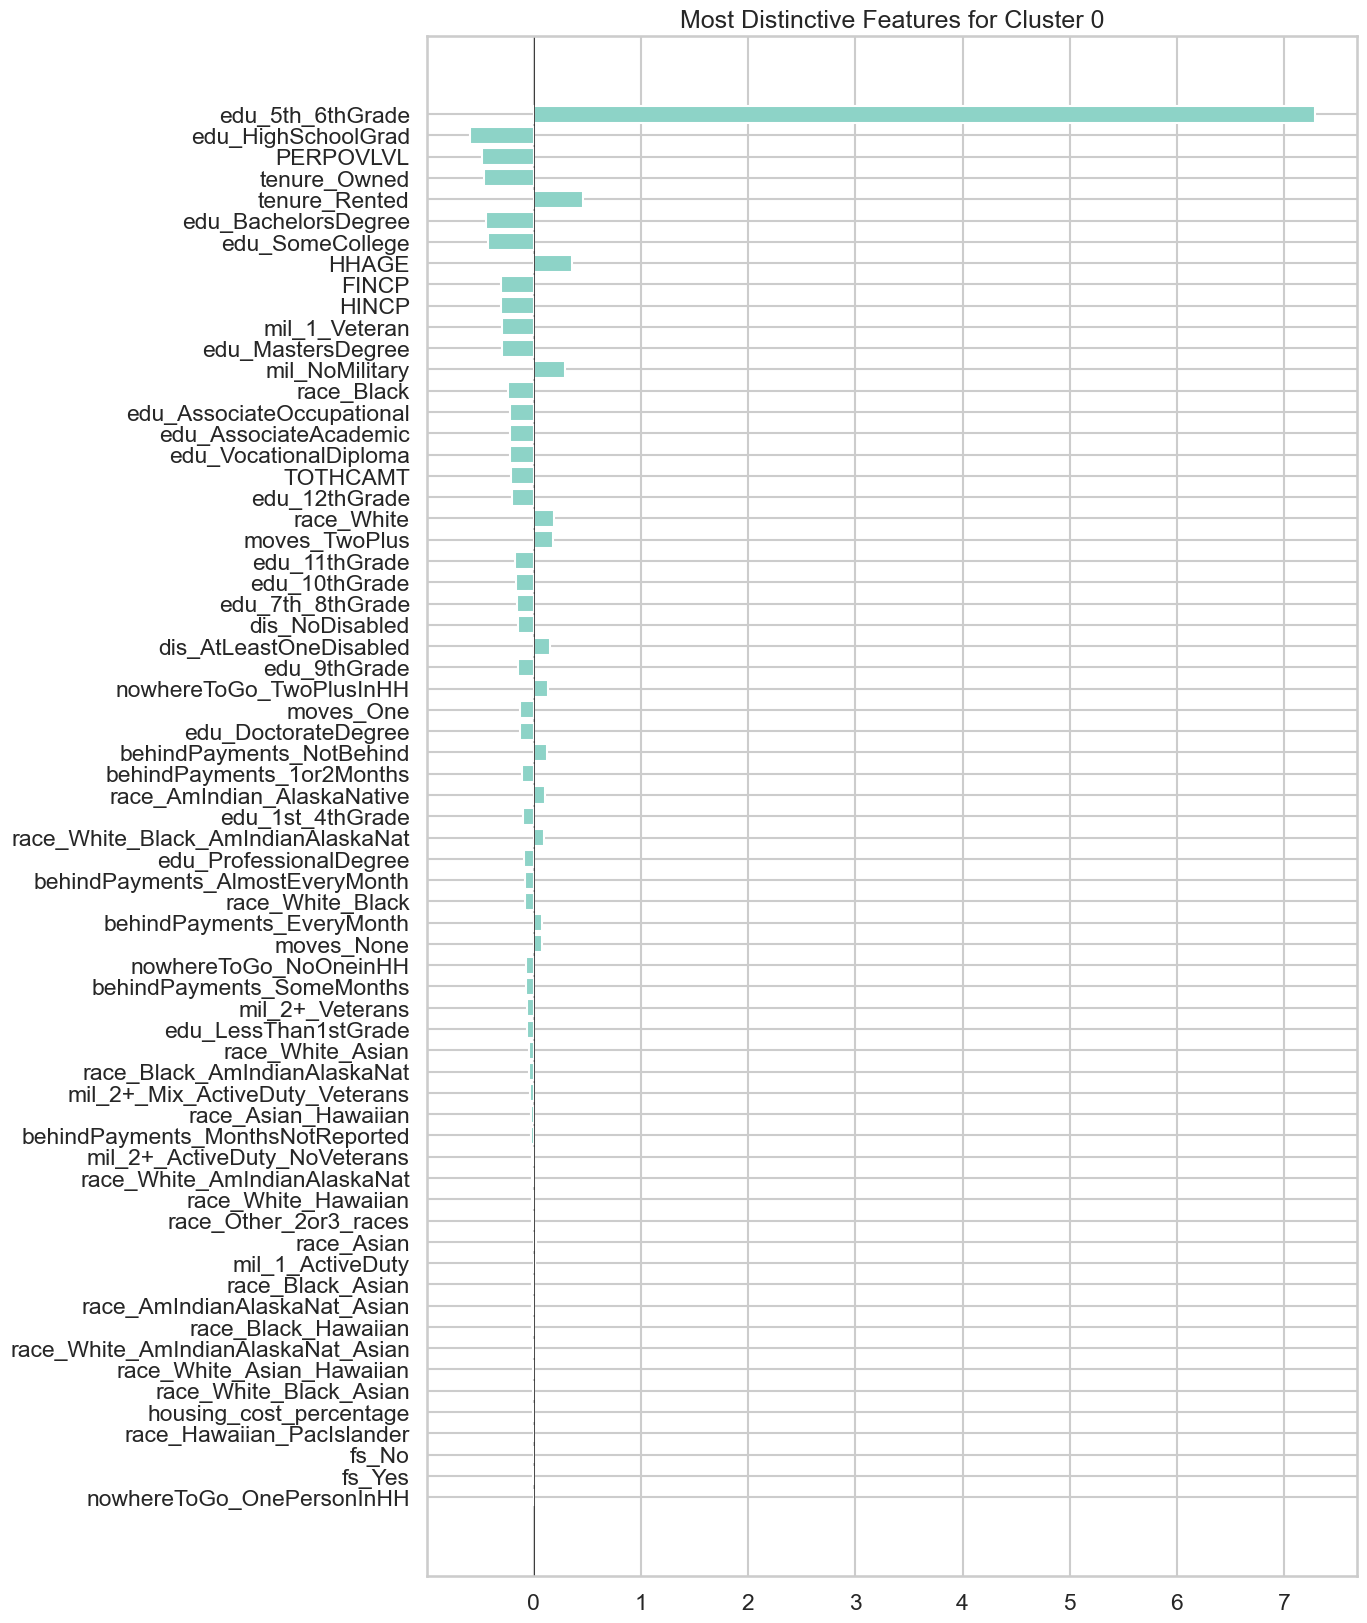

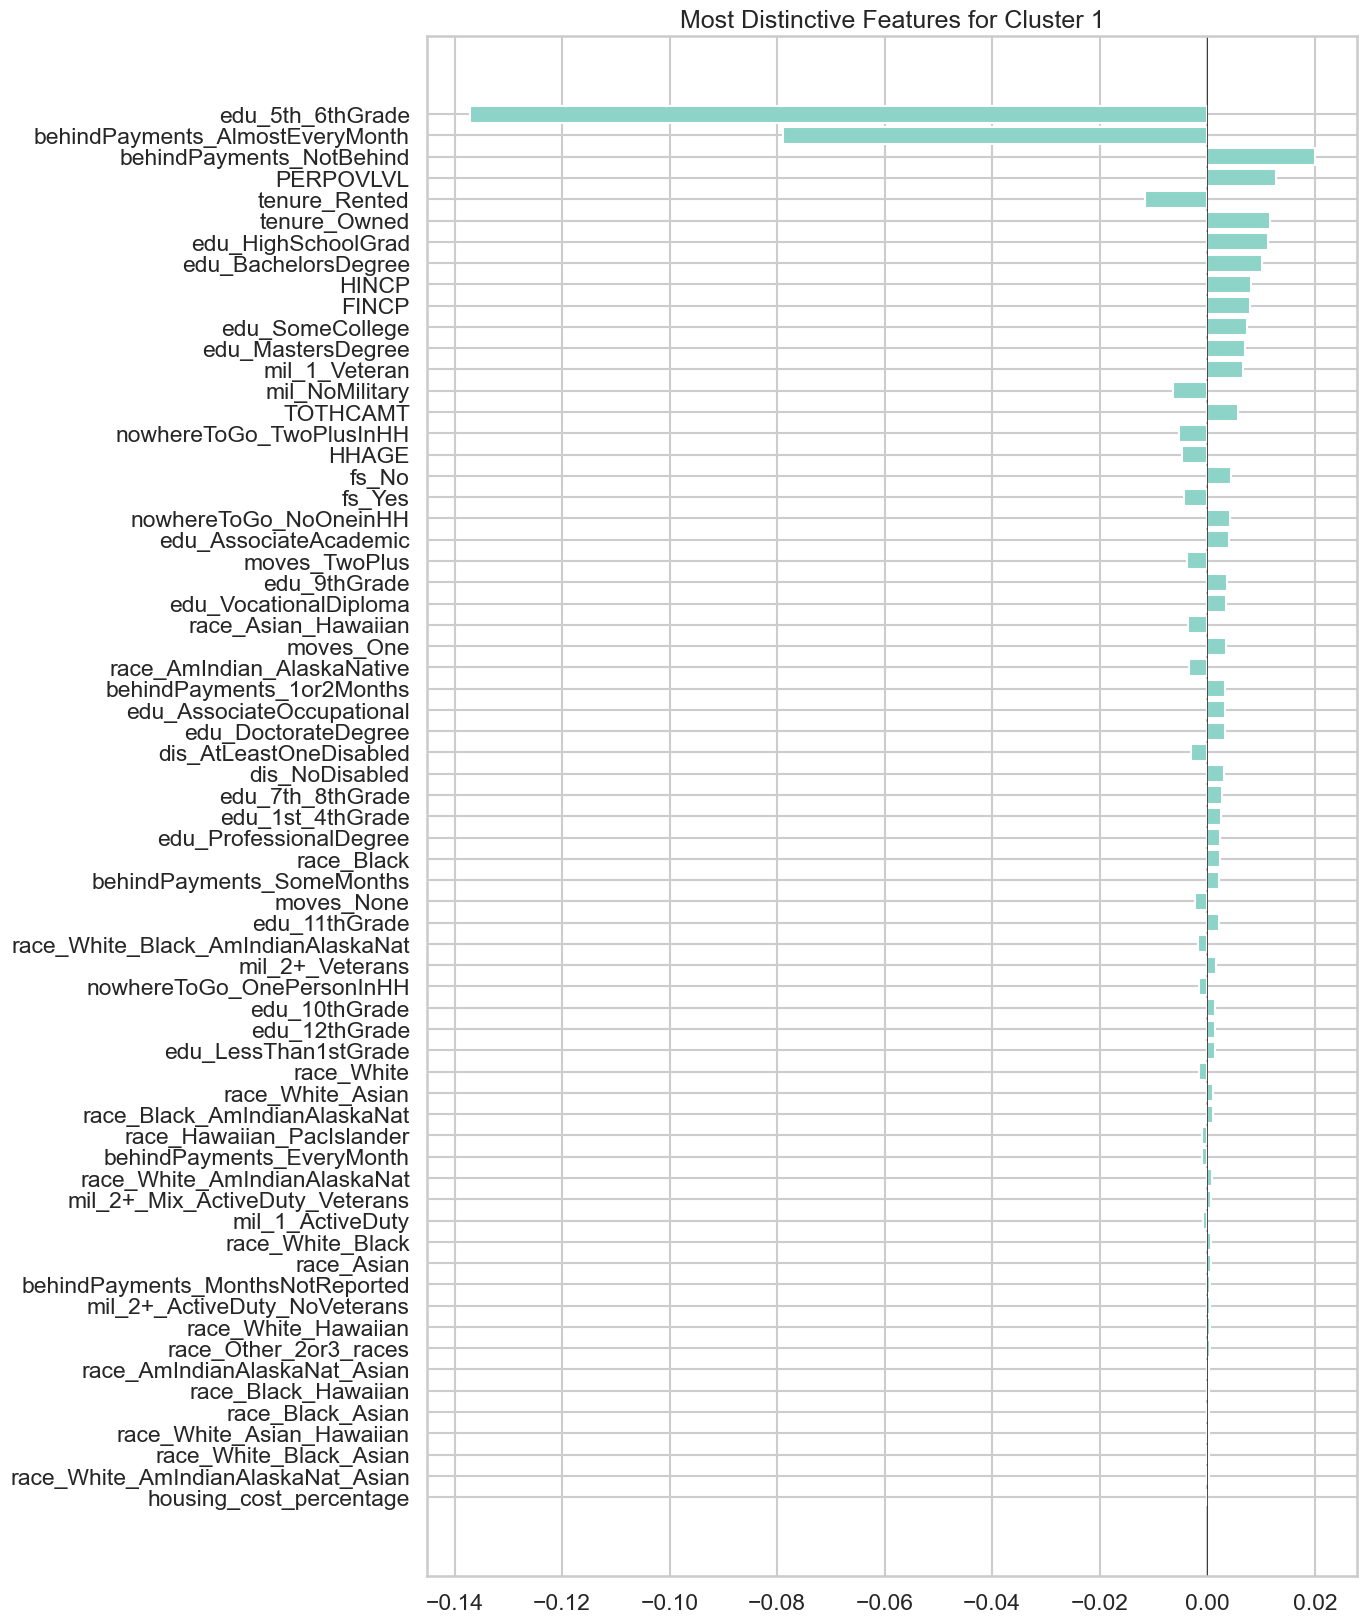

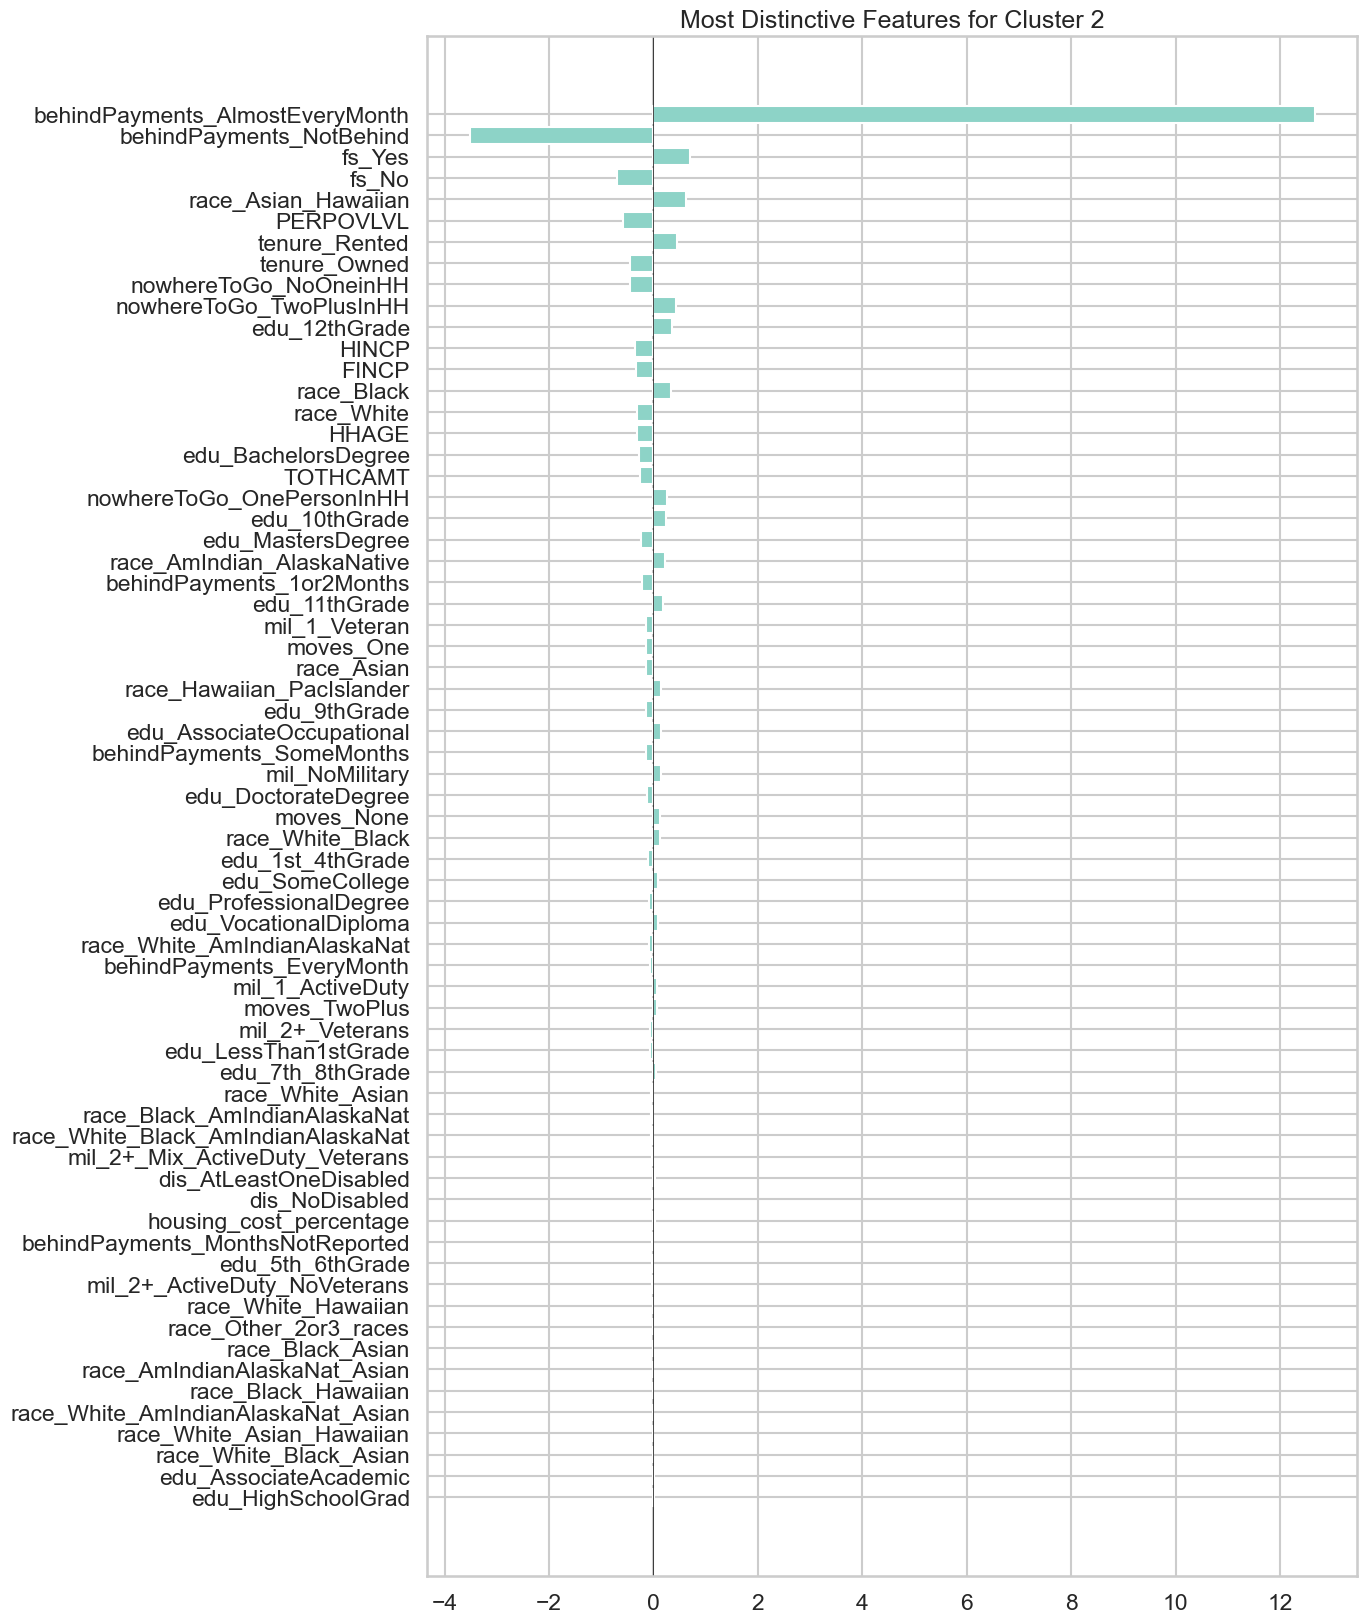

In [8]:
import numpy as np

# For each cluster, find most important features
for cluster_id in range(3):
    cluster_samples = X_scaled[df["cluster"] == cluster_id]
    cluster_mean = cluster_samples.mean(axis=0)
    overall_mean = X_scaled.mean(axis=0)

    # Calculate difference from overall mean
    feature_importance = cluster_mean - overall_mean

    # Create bar plot of top features
    plt.figure(figsize=(12, 20))
    feature_names = np.array(feature_cols)
    sorted_idx = np.argsort(np.abs(feature_importance))  # Top 10 features
    plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
    plt.title(f"Most Distinctive Features for Cluster {cluster_id}")
    plt.axvline(x=0, color="black", linestyle="-", linewidth=0.5)


## 2nd Approach considering above info


### Risk Score Calculation


In [9]:
df2 = df.copy()


# risk score creation for target variable
def calculate_evidence_based_homelessness_risk(row):

    risk_score = 0

    # =============== HOUSING COST BURDEN ===============

    if row["housing_cost_percentage"] > 50:  # High risk
        risk_score += 30
    elif row["housing_cost_percentage"] > 35:  
        risk_score += 15
    elif row["housing_cost_percentage"] >= 30: # Cost Burden threshold
        risk_score += 10

    # =============== PREVIOUS HOMELESSNESS EXPERIENCE ===============

    if row["expHomelessness_OnePersonInHH"] == 1:
        risk_score += 10

    if row["expHomelessness_TwoPlusInHH"] == 1:
        risk_score += 20

    # =============== HOUSING INSTABILITY INDICATORS ===============

    if row["moves_TwoPlus"] == 1:  # Multiple recent moves
        risk_score += 9

    elif row["moves_One"] == 1:  # One recent move
        risk_score += 3

    # =============== PAYMENT PROBLEMS ===============

    if (
        row["behindPayments_EveryMonth"] == 1
        or row["behindPayments_AlmostEveryMonth"] == 1
    ):
        risk_score += 25
    elif row["behindPayments_SomeMonths"] == 1:
        risk_score += 15
    elif row["behindPayments_1or2Months"] == 1:
        risk_score += 8

    # =============== NOWHERE ELSE TO GO ===============

    if row["nowhereToGo_OnePersonInHH"] == 1 or row["nowhereToGo_TwoPlusInHH"] == 1:
        risk_score += 15

    # =============== POVERTY LEVEL ===============

    if row["PERPOVLVL"] <= 30:  # Extremely low income
        risk_score += 25
    elif row["PERPOVLVL"] <= 50:  # Very low income
        risk_score += 20
    elif row["PERPOVLVL"] <= 100:  # Low income
        risk_score += 15

    # =============== TENURE STATUS ===============

    if row["tenure_Rented"] == 1:
        risk_score += 10

    # =============== SAFETY NET PARTICIPATION ===============

    if row["fs_Yes"] == 1:  # Food stamps
        risk_score += 5

    # =============== EDUCATION LEVEL ===============

    if (
        row["edu_LessThan1stGrade"] == 1
        or row["edu_1st_4thGrade"] == 1
        or row["edu_5th_6thGrade"] == 1
        or row["edu_7th_8thGrade"] == 1
        or row["edu_9thGrade"] == 1
        or row["edu_10thGrade"] == 1
        or row["edu_11thGrade"] == 1
        or row["edu_12thGrade"] == 1
    ):
        risk_score += 22
    elif row["edu_HighSchoolGrad"] == 1:
        risk_score += 5
    elif (
        row["edu_BachelorsDegree"] == 1
        or row["edu_MastersDegree"] == 1
        or row["edu_ProfessionalDegree"] == 1
        or row["edu_DoctorateDegree"] == 1
    ):
        risk_score -= 10

    # =============== MILITARY SERVICE ===============

    if row["mil_1_Veteran"] == 1 or row["mil_2+_Veterans"] == 1:
        risk_score += 15

    # Veterans with housing cost burden
    if (row["mil_1_Veteran"] == 1 or row["mil_2+_Veterans"] == 1) and row[
        "housing_cost_percentage"
    ] > 50:
        risk_score += 8

    # =============== DISABILITY STATUS ===============

    if row["dis_AtLeastOneDisabled"] == 1:
        risk_score += 18

    # =============== AGE FACTORS ===============

    if row["HHAGE"] < 25:
        risk_score += 12

    elif row["HHAGE"] >= 55:
        risk_score += 15

        # Risk increases with age due to fixed incomes, health issues
        if row["HHAGE"] >= 65:
            risk_score += 8

    # =============== FACTOR COMBINATIONS WITH MULTIPLICATIVE EFFECTS ===============

    if row["dis_AtLeastOneDisabled"] == 1 and row["housing_cost_percentage"] > 50:
        risk_score += 10

    if (
        row["edu_LessThan1stGrade"] == 1
        or row["edu_1st_4thGrade"] == 1
        or row["edu_5th_6thGrade"] == 1
        or row["edu_7th_8thGrade"] == 1
        or row["edu_9thGrade"] == 1
        or row["edu_10thGrade"] == 1
        or row["edu_11thGrade"] == 1
        or row["edu_12thGrade"] == 1
    ) and row["PERPOVLVL"] <= 50:
        risk_score += 12

    # Age 65+ and disability creates severe risk
    if row["HHAGE"] >= 65 and row["dis_AtLeastOneDisabled"] == 1:
        risk_score += 10

    # Prior homelessness and current payment problems indicate risk
    if (
        row["expHomelessness_OnePersonInHH"] == 1
        or row["expHomelessness_TwoPlusInHH"] == 1
    ) and (
        row["behindPayments_EveryMonth"] == 1
        or row["behindPayments_AlmostEveryMonth"] == 1
        or row["behindPayments_SomeMonths"] == 1
    ):
        risk_score += 15

    # Normalize to 0-100 scale
    return min(risk_score, 100)


# Apply to create initial risk score
df2["initial_risk_score"] = df2.apply(
    calculate_evidence_based_homelessness_risk, axis=1
)

df2


,OMB13CBSA,HHAGE,HINCP,PERPOVLVL,FINCP,TOTHCAMT,housing_cost_percentage,race_White,race_Black,race_AmIndian_AlaskaNative,...,moves_One,moves_TwoPlus,behindPayments_1or2Months,behindPayments_SomeMonths,behindPayments_AlmostEveryMonth,behindPayments_EveryMonth,behindPayments_MonthsNotReported,behindPayments_NotBehind,cluster,initial_risk_score
0,99998,21,48000,199,48000,1093,27.0,1,0,0,...,1,0,0,0,0,0,0,1,1,48
1,99998,58,31400,202,31400,1684,64.0,1,0,0,...,0,0,0,0,0,0,0,1,1,100
2,99998,39,176700,273,176700,3674,25.0,1,0,0,...,0,0,0,0,0,0,0,1,1,48
3,99998,77,1200,8,1200,340,340.0,1,0,0,...,0,0,0,0,0,0,0,1,1,98
4,99998,44,159600,501,159600,1952,15.0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,33100,59,100000,497,100000,2910,35.0,1,0,0,...,1,0,0,0,0,0,0,1,1,28
10331,26420,68,40000,108,0,1100,33.0,1,0,0,...,0,0,0,0,0,0,0,1,1,70
10332,99998,61,72400,362,72400,1861,31.0,1,0,0,...,1,0,0,0,0,0,0,1,1,18
10333,99998,49,125000,501,125000,1580,15.0,1,0,0,...,0,0,0,0,0,0,0,1,1,25


### Drop Race, Cluster & Location columns


In [10]:
race_loc_cols = [
    col
    for col in df2.columns
    if col.startswith("race_") or col in ["OMB13CBSA", "cluster"]
]

# scaler2 = StandardScaler()

# df2_x_scaled = scaler2.fit_transform(df2.drop(
#     columns=[
#         "initial_risk_score",
#         "expHomelessness_NoOneinHH",
#         "expHomelessness_OnePersonInHH",
#         "expHomelessness_TwoPlusInHH",
#     ], axis=1))

df2.drop(race_loc_cols, axis=1, inplace=True)

df2.to_csv("5-risk_scores-race_and_loc_removal.csv")


In [11]:
df2[df2["initial_risk_score"] == 100].describe()


,HHAGE,HINCP,PERPOVLVL,FINCP,TOTHCAMT,housing_cost_percentage,edu_LessThan1stGrade,edu_1st_4thGrade,edu_5th_6thGrade,edu_7th_8thGrade,...,moves_None,moves_One,moves_TwoPlus,behindPayments_1or2Months,behindPayments_SomeMonths,behindPayments_AlmostEveryMonth,behindPayments_EveryMonth,behindPayments_MonthsNotReported,behindPayments_NotBehind,initial_risk_score
count,1336.00,1336.00,1336.00,1336.00,1336.00,1336.00,1336.00,1336.00,1336.00,1336.00,...,1336.00,1336.0,1336.00,1336.00,1336.00,1336.00,1336.00,1336.0,1336.00,1336.0
mean,65.89,11665.94,64.46,11469.13,1211.56,455.47,0.01,0.03,0.05,0.08,...,0.88,0.1,0.02,0.07,0.04,0.02,0.02,0.0,0.85,100.0
std,14.54,16033.48,62.48,15805.47,2604.25,2300.39,0.11,0.17,0.21,0.26,...,0.32,0.3,0.12,0.26,0.21,0.13,0.13,0.0,0.36,0.0
min,15.00,130.00,1.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,100.0
25%,59.00,1985.00,12.00,1900.00,370.00,56.00,0.00,0.00,0.00,0.00,...,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,100.0
50%,68.00,10000.00,58.00,9915.00,770.00,115.00,0.00,0.00,0.00,0.00,...,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,100.0
75%,77.00,14525.00,90.00,14400.00,1380.25,353.25,0.00,0.00,0.00,0.00,...,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,100.0
max,85.00,388000.00,501.00,388000.00,80867.00,74646.00,1.00,1.00,1.00,1.00,...,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.0,1.00,100.0


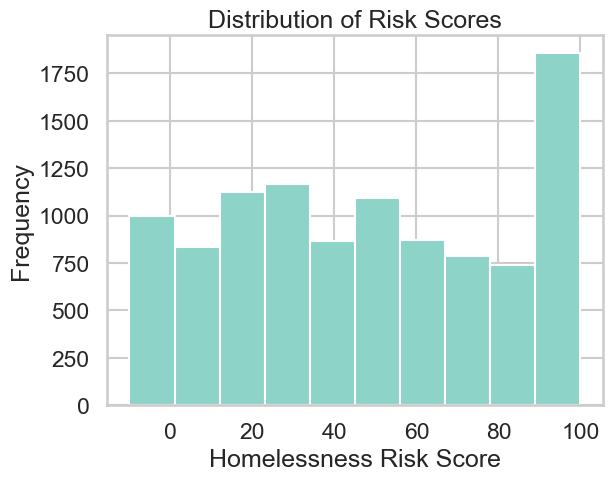

In [12]:
plt.hist(df2["initial_risk_score"], bins=10)
plt.xlabel("Homelessness Risk Score")
plt.ylabel("Frequency")
plt.title("Distribution of Risk Scores")
plt.show()


In [13]:
print("Count of Risk Scores greater than 50:", df2[df2['initial_risk_score'] > 50].count()[1])

print("Count of Risk Scores less than 50:",df2[df2['initial_risk_score'] < 50].count()[1])


Count of Risk Scores greater than 50: 4709
Count of Risk Scores less than 50: 5516


C:\Users\Bryan\AppData\Local\Temp\ipykernel_23172\777383900.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Count of Risk Scores greater than 50:", df2[df2['initial_risk_score'] > 50].count()[1])
C:\Users\Bryan\AppData\Local\Temp\ipykernel_23172\777383900.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Count of Risk Scores less than 50:",df2[df2['initial_risk_score'] < 50].count()[1])


### Begin Model Selection & Training


In [14]:
from sklearn.model_selection import train_test_split


X = df2.drop(
    [
        "initial_risk_score",
        "expHomelessness_NoOneinHH",
        "expHomelessness_OnePersonInHH",
        "expHomelessness_TwoPlusInHH",
    ],
    axis=1,
)


y = df2["initial_risk_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X.columns)
# X_test = pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X.columns)


In [15]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train model
xgbr_model = XGBRegressor(n_estimators=100, random_state=42)

xgbr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgbr_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error: 2.43
Mean Squared Error: 15.76
R² Score: 0.9866


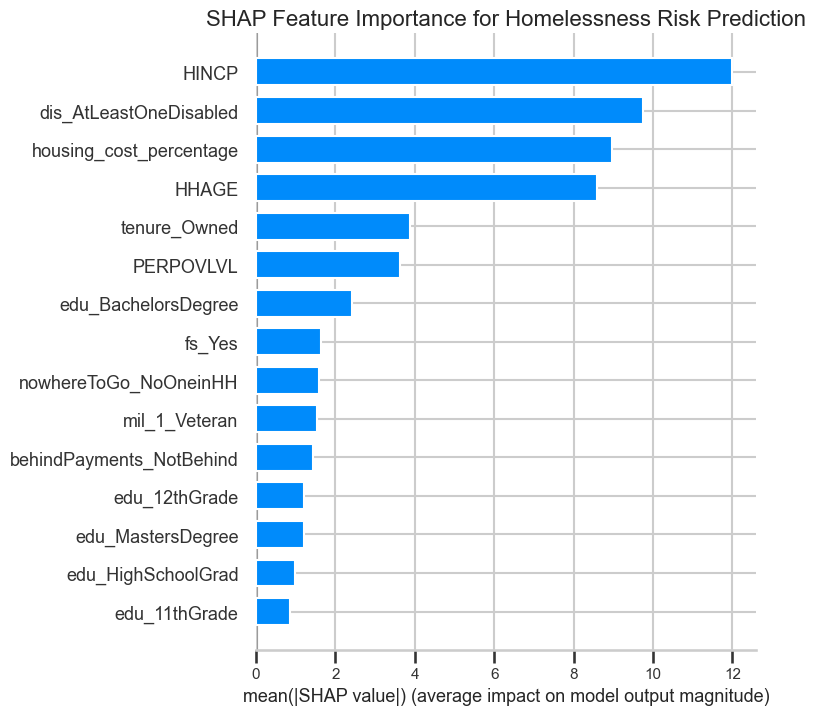

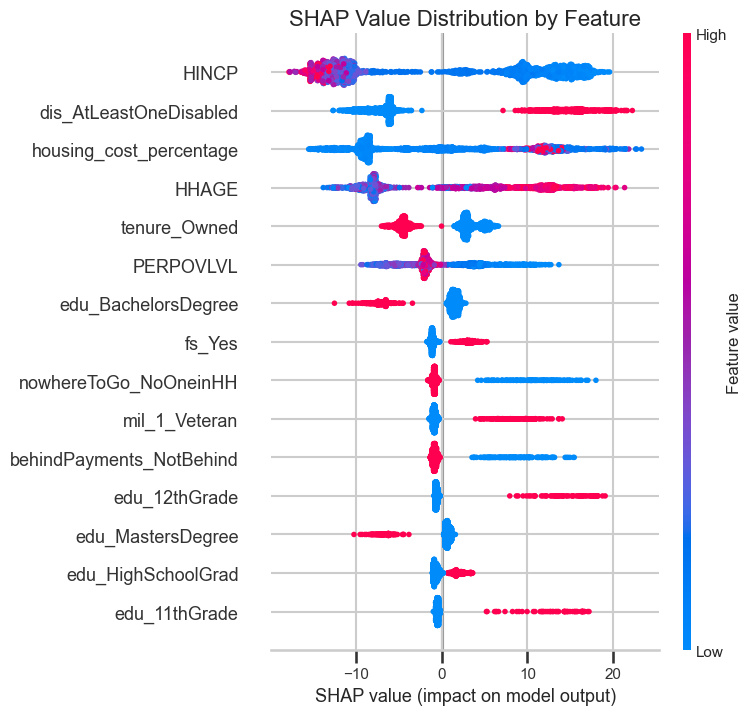

Top 10 most important features:
                    Feature  Importance
1                     HINCP       12.00
31   dis_AtLeastOneDisabled        9.75
5   housing_cost_percentage        8.97
0                     HHAGE        8.60
23             tenure_Owned        3.87
2                 PERPOVLVL        3.64
19      edu_BachelorsDegree        2.42
33                   fs_Yes        1.63
35    nowhereToGo_NoOneinHH        1.58
26            mil_1_Veteran        1.53


<Figure size 3000x1200 with 0 Axes>

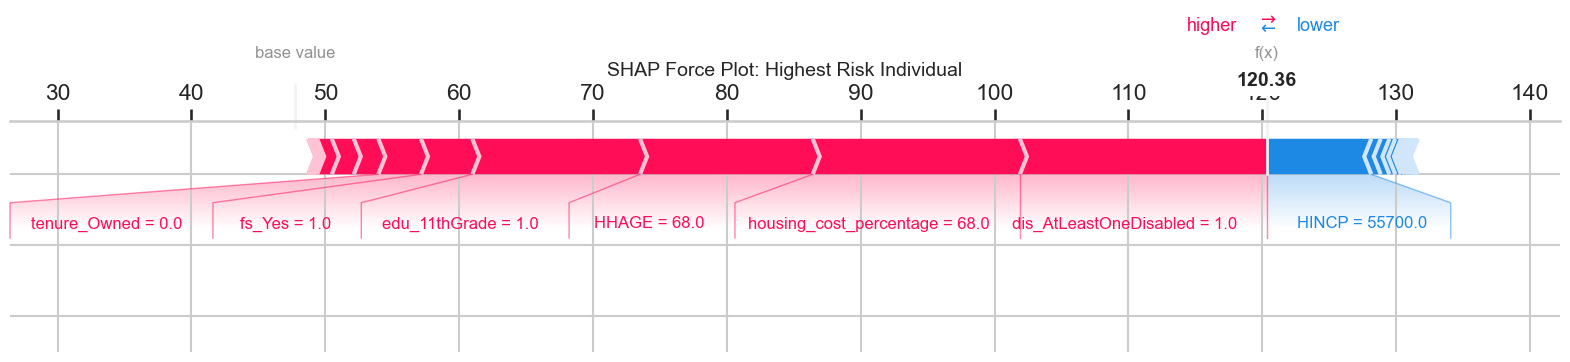

<Figure size 3000x1200 with 0 Axes>

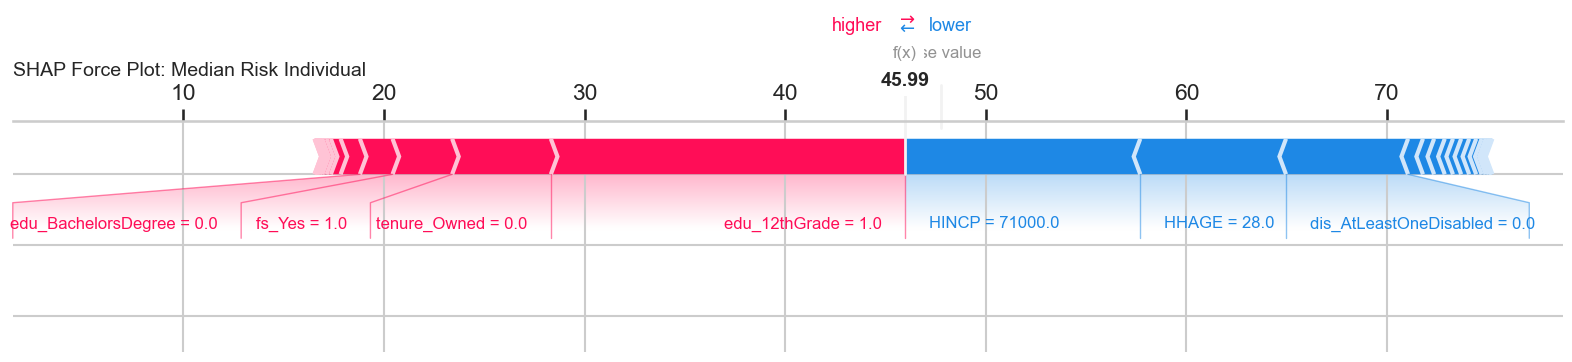

<Figure size 3000x1200 with 0 Axes>

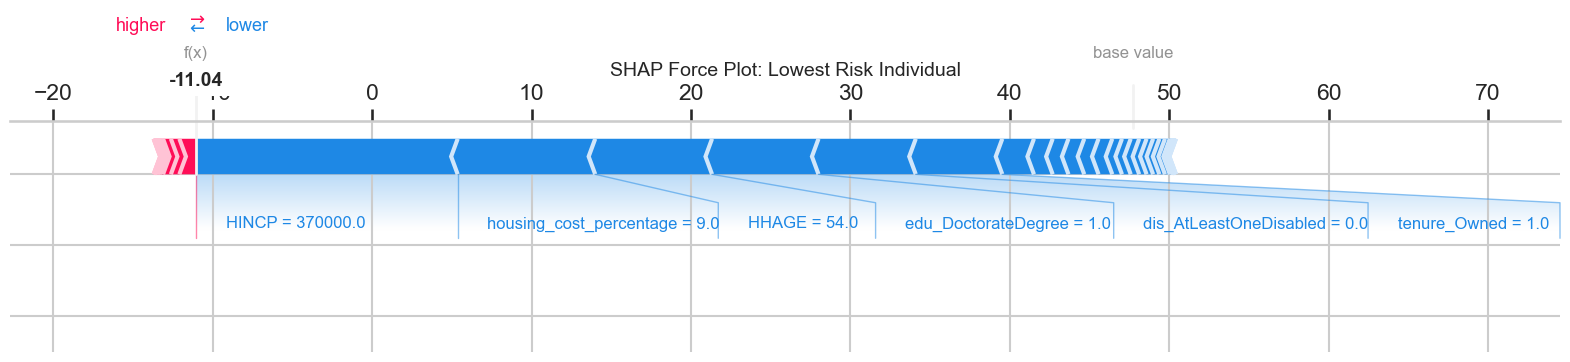

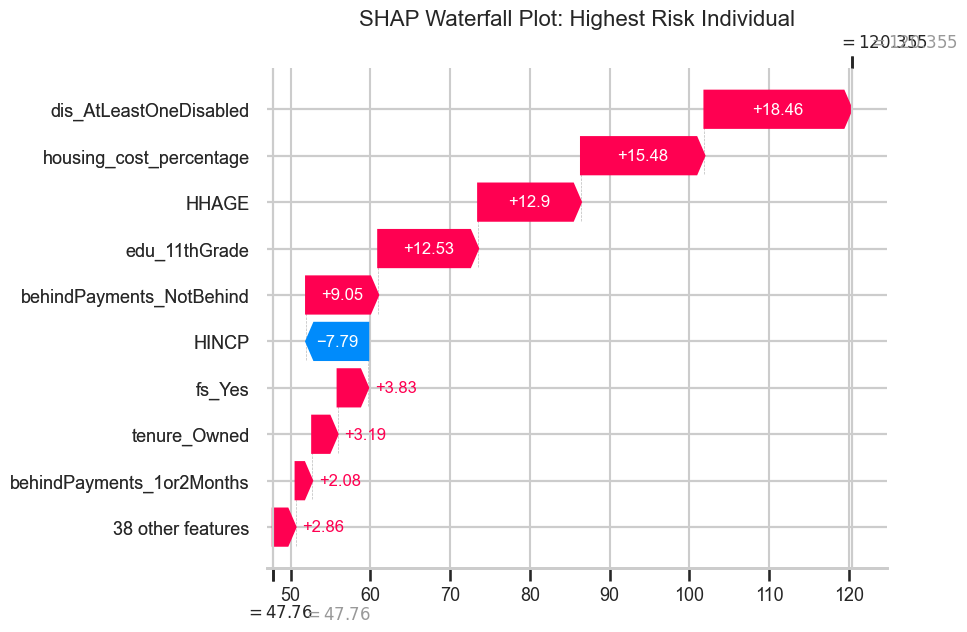


HIGH RISK INDIVIDUAL EXPLANATION:
Risk Score: 120.4
Base Risk (Average): 47.8

Top Risk Factors:
1. dis_AtLeastOneDisabled: +18.46 risk points
2. housing_cost_percentage: +15.48 risk points
3. HHAGE: +12.90 risk points
4. edu_11thGrade: +12.53 risk points
5. behindPayments_NotBehind: +9.05 risk points

Protective Factors:
1. HINCP: -7.79 risk points
2. edu_HighSchoolGrad: -0.71 risk points
3. mil_1_Veteran: -0.65 risk points


MEDIAN RISK INDIVIDUAL EXPLANATION:
Risk Score: 46.0
Base Risk (Average): 47.8

Top Risk Factors:
1. edu_12thGrade: +17.67 risk points
2. tenure_Owned: +4.92 risk points
3. fs_Yes: +2.97 risk points
4. edu_BachelorsDegree: +1.63 risk points
5. edu_MastersDegree: +0.96 risk points

Protective Factors:
1. HINCP: -11.71 risk points
2. HHAGE: -7.26 risk points
3. dis_AtLeastOneDisabled: -6.08 risk points


LOW RISK INDIVIDUAL EXPLANATION:
Risk Score: -11.0
Base Risk (Average): 47.8

Top Risk Factors:
1. edu_BachelorsDegree: +1.05 risk points
2. edu_MastersDegree: +0

In [17]:
import shap

# SHAP explainer
explainer = shap.TreeExplainer(xgbr_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot showing feature importance
plt.figure(figsize=(14, 10))
shap.summary_plot(
    shap_values, 
    X_test, 
    plot_type="bar",
    feature_names=X_test.columns.tolist(),
    max_display=15,  # Show top 15 features
    show=False
)
plt.title("SHAP Feature Importance for Homelessness Risk Prediction", fontsize=16)
plt.tight_layout()
plt.show()

# Detailed summary plot showing distribution of SHAP values
plt.figure(figsize=(14, 10))
shap.summary_plot(
    shap_values, 
    X_test,
    feature_names=X_test.columns.tolist(),
    max_display=15,
    show=False
)
plt.title("SHAP Value Distribution by Feature", fontsize=16)
plt.tight_layout()
plt.show()

# Get feature importance ranking from SHAP values
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': np.abs(shap_values).mean(axis=0)
}).sort_values('Importance', ascending=False)

print("Top 10 most important features:")
print(feature_importance.head(10))

# Create force plots for different risk levels
# Find highest risk individual
high_risk_idx = xgbr_model.predict(X_test).argmax()

# Find individual at median risk
median_risk_idx = np.argsort(xgbr_model.predict(X_test))[len(X_test)//2]

# Find lowest risk individual
low_risk_idx = xgbr_model.predict(X_test).argmin()

# High risk explanation
plt.figure(figsize=(30, 12))
shap.plots.force(
    explainer.expected_value, 
    shap_values[high_risk_idx,:], 
    X_test.iloc[high_risk_idx,:],
    feature_names=X_test.columns[0:35].tolist(),
    matplotlib=True,
    show=False
)

plt.title("SHAP Force Plot: Highest Risk Individual", fontsize=14)
plt.show()

# Median risk explanation
plt.figure(figsize=(30, 12))
shap.plots.force(
    explainer.expected_value, 
    shap_values[median_risk_idx,:], 
    X_test.iloc[median_risk_idx,:],
    feature_names=X_test.columns[0:35].tolist(),
    matplotlib=True,
    show=False
)
plt.title("SHAP Force Plot: Median Risk Individual", fontsize=14, loc='left')
plt.show()

# Low risk explanation
plt.figure(figsize=(30, 12))
shap.plots.force(
    explainer.expected_value, 
    shap_values[low_risk_idx,:], 
    X_test.iloc[low_risk_idx,:],
    feature_names=X_test.columns.tolist(),
    matplotlib=True,
    show=False
)
plt.title("SHAP Force Plot: Lowest Risk Individual", fontsize=14)
plt.show()

# Create waterfall plots for detailed individual explanations
plt.figure(figsize=(30, 18))
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[high_risk_idx,:],
    feature_names=X_test.columns.tolist(),
    max_display=10,
    show=False
)
plt.title("SHAP Waterfall Plot: Highest Risk Individual", fontsize=16)
plt.show()

# Human readable explanation of risk factors for Low/Med/High risk individuals
def generate_risk_explanation(idx, X_data, shap_values, expected_value, feature_names):
    """Generate a human-readable explanation of risk factors for a specific individual"""
    # Get SHAP values for this person
    person_shap = shap_values[idx]
    
    # Get the predicted risk score
    risk_score = xgbr_model.predict(X_data.iloc[idx:idx+1])[0]
    
    # Sort features by SHAP impact (absolute value)
    feature_impacts = sorted(
        zip(feature_names, person_shap),
        key=lambda x: abs(x[1]),
        reverse=True
    )
    
    # Get top 5 factors increasing risk and top 3 factors decreasing risk
    risk_factors = [(name, impact) for name, impact in feature_impacts if impact > 0][:5]
    protective_factors = [(name, impact) for name, impact in feature_impacts if impact < 0][:3]
    
    # Format the explanation
    explanation = f"Risk Score: {risk_score:.1f}\n"
    explanation += f"Base Risk (Average): {expected_value:.1f}\n\n"
    
    explanation += "Top Risk Factors:\n"
    for i, (feature, impact) in enumerate(risk_factors, 1):
        # Format feature name for readability
        # feature_name = feature.replace('_', ' ').title()
        explanation += f"{i}. {feature}: +{impact:.2f} risk points\n"
    
    explanation += "\nProtective Factors:\n"
    for i, (feature, impact) in enumerate(protective_factors, 1):
        # Format feature name for readability
        # feature_name = feature.replace('_', ' ').title()
        explanation += f"{i}. {feature}: {impact:.2f} risk points\n"
    
    return explanation

# Generate and print explanations for high, median, and low risk individuals
print("\nHIGH RISK INDIVIDUAL EXPLANATION:")
print(generate_risk_explanation(high_risk_idx, X_test, shap_values, 
                               explainer.expected_value, X_test.columns))

print("\nMEDIAN RISK INDIVIDUAL EXPLANATION:")
print(generate_risk_explanation(median_risk_idx, X_test, shap_values, 
                               explainer.expected_value, X_test.columns))

print("\nLOW RISK INDIVIDUAL EXPLANATION:")
print(generate_risk_explanation(low_risk_idx, X_test, shap_values, 
                               explainer.expected_value, X_test.columns))
